# 3. Modeling

Note: This notebook is **Part 3** of a three notebook series:

- Part 1: ML Project - 1. Exploratory Data Analysis
- Part 2: ML Project - 2. Feature Engineering & Analysis
- Part 3: ML Project - 3. Modeling

**Part 3** focuses on modeling and observing the features (parts of the house) that have the most ***positive*** impact on `SalesPrice`. 

# 3.1. Import Data

**3.1.a.** Import required libraries.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from sklearn import preprocessing

**3.1.b.** Read in engineered dataframe.

In [2]:
housedf = pd.read_pickle("housedf.pkl")
housedf.columns

Index(['GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning', 'LotFrontage',
       'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition', 'ExteriorSF', 'AgeAtSale',
       'GarageAgeAtSale', 'TimeSinceLastWo

**3.1.c.** Check to see if dataframe has been read as intended.

In [3]:
housedf.head()

,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,GarageAgeAtSale,TimeSinceLastWork,TotalSF,2Stories,FinBsmt,UnfBsmt,TotalBathrooms,OutdoorLiving,HasPool,HasFireplace
0,856,126000,30,5,0.0,7890,1,1,3,3,...,71.0,60,1712.0,False,True,True,2.0,True,False,True
1,1049,139500,120,5,42.0,4235,1,1,3,3,...,25.0,25,2098.0,False,True,True,3.0,True,False,False
2,1001,124900,30,1,60.0,6060,1,1,3,3,...,77.0,0,1838.0,False,True,True,1.0,True,False,False
3,1039,114000,70,5,80.0,8146,1,1,3,3,...,69.0,6,1444.0,True,False,True,1.0,True,False,False
4,1665,227000,60,5,70.0,8400,1,1,3,3,...,8.0,8,2475.0,True,True,True,3.5,True,False,False


In [4]:
housedf.shape

(2579, 74)

In [5]:
housedf.isnull().values.any()

False

# 3.2. Modeling

**3.2.a.** Define X and y with `housedf_reduced` and split the data for hyperparameter tuning.

In [6]:
y = housedf["SalePrice"]
X = housedf.drop("SalePrice", axis = 1)

In [7]:
from sklearn.model_selection import train_test_split
X_trainvalidate, X_test, y_trainvalidate, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_validate, y_train, y_validate = train_test_split(X_trainvalidate, y_trainvalidate, test_size=0.875) # yields 70%/10%/20% split

**3.2.b** Randomized Hyperparameter Grid to find a range of values.

In [8]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

In [9]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [10]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [11]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [12]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/elijahspiegel/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/elijahspiegel/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/elijahspiegel/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Users/elijahspiegel/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/elijahspiegel/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [13]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': False}

In [14]:
rf_random.score(X_validate, y_validate)

0.8267187625208623

<AxesSubplot:>

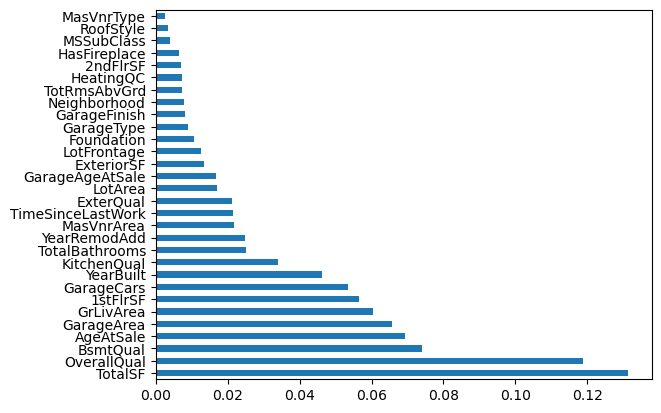

In [15]:
featureimportances = pd.Series(rf_random.best_estimator_.feature_importances_, index = X_train.columns)
featureimportances.nlargest(30).plot(kind = 'barh')

**3.2.c.** Visualize model performance with only most important features

In [16]:
# sort by most to least important
featureimportances = featureimportances.sort_values(ascending=False)

In [17]:
# train rf model adding one feature at a time from most to least important
step_scores = []
for i in range(len(featureimportances)):
    X_trainvalidate_sub = X_trainvalidate[featureimportances.index[0:i+1]]
    X_test_sub = X_test[featureimportances.index[0:i+1]]
    rf.fit(X_trainvalidate_sub, y_trainvalidate)
    score = rf.score(X_test_sub, y_test)
    step_scores.append(score)

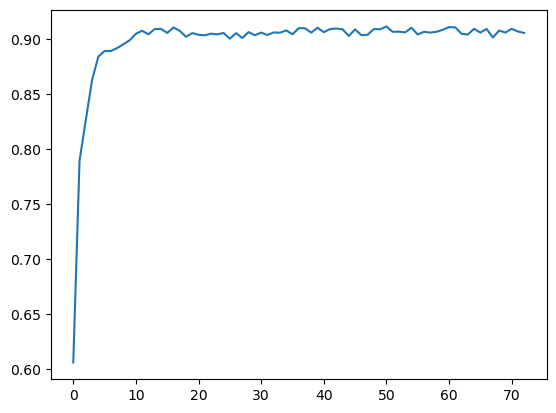

In [18]:
import matplotlib.pyplot as plt
plt.plot(step_scores)

**3.2.d.** Performance starts to level off at about 0.91.

In [19]:
print(pd.Series(step_scores, index=featureimportances.index).to_string())

TotalSF              0.605980
OverallQual          0.789187
BsmtQual             0.826196
AgeAtSale            0.862504
GarageArea           0.883898
GrLivArea            0.888978
1stFlrSF             0.889035
GarageCars           0.891671
YearBuilt            0.895145
KitchenQual          0.898734
TotalBathrooms       0.904704
YearRemodAdd         0.907372
MasVnrArea           0.904228
TimeSinceLastWork    0.908936
ExterQual            0.909170
LotArea              0.905458
GarageAgeAtSale      0.910382
ExteriorSF           0.907403
LotFrontage          0.901929
Foundation           0.905315
GarageType           0.903770
GarageFinish         0.903279
Neighborhood         0.904790
TotRmsAbvGrd         0.904141
HeatingQC            0.905389
2ndFlrSF             0.900252
HasFireplace         0.905199
MSSubClass           0.900881
RoofStyle            0.906232
MasVnrType           0.903357
BsmtExposure         0.905708
BsmtFinType1         0.903563
CentralAir           0.905912
OverallCon

**3.2.d.** Build RF model with the 13 most important features and CV for hyperparameters.

In [20]:
X_trainvalidate_sub = X_trainvalidate[featureimportances.index[0:13]]
X_test_sub = X_test[featureimportances.index[0:13]]

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 50, cv = 5, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X_trainvalidate_sub, y_trainvalidate)
rf_random.best_params_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/Users/elijahspiegel/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/elijahspiegel/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/elijahspiegel/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Users/elijahspiegel/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/elijahspiegel/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/elijahspiegel/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Users/elijahspiegel/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/elijahspiegel/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/elijahspiegel/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

/Users/elijahspiegel/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/elijahspiegel/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/elijahspiegel/opt/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:414: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [21]:
rf_random.score(X_test_sub, y_test)

0.9161549405096848

<AxesSubplot:>

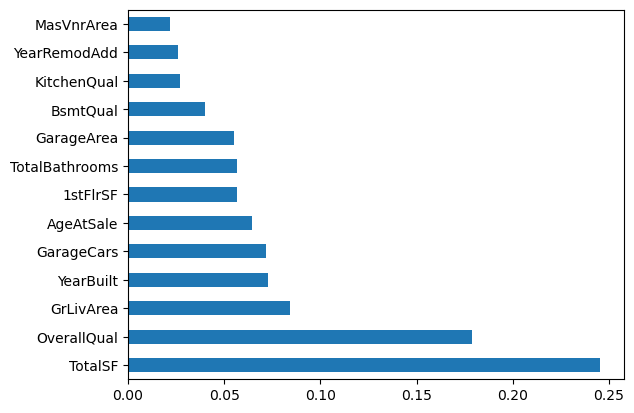

In [22]:
featureimportances = pd.Series(rf_random.best_estimator_.feature_importances_,
                               index = X_trainvalidate_sub.columns)
featureimportances.nlargest(30).plot(kind = 'barh')

In [23]:
base_model = RandomForestRegressor()
base_model.fit(X_trainvalidate, y_trainvalidate)
base_model.score(X_test, y_test)

0.9068414871457997

## 3.3. Feature Importance | Shapley Values

**3.3.a.** Find out how positive or negative features contribute to the prediction of `SalesPrice` using Shapley Values. 

Reference: https://github.com/slundberg/shap


In [33]:
import shap

In [34]:
explainer = shap.Explainer(rf_random.predict, X_test_sub)

In [35]:
shap_values = explainer(X_test_sub)

Permutation explainer: 517it [27:39,  3.24s/it]                                 


In [48]:
import pickle
with open('shapval.pkl', 'wb') as dest:
    pickle.dump(shap_values, dest, protocol=pickle.HIGHEST_PROTOCOL)
#shap_values = pickle.load('shapval.pkl')

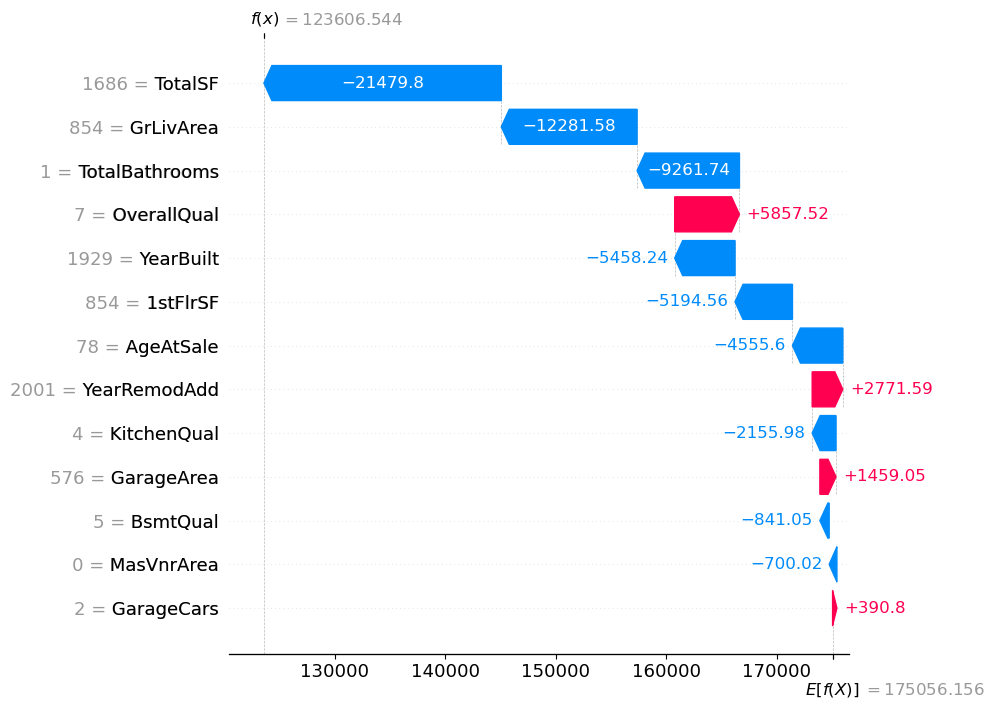

In [36]:
shap.plots.waterfall(shap_values[0], max_display=20)

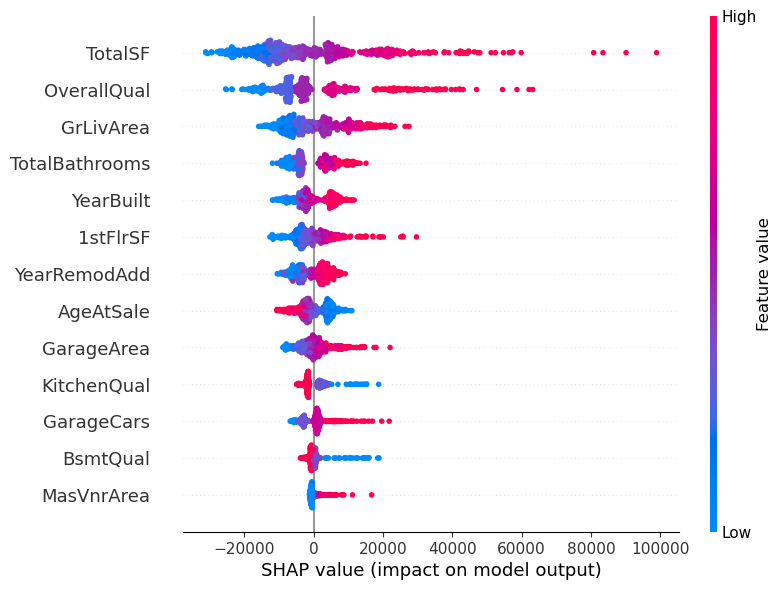

In [37]:
shap.plots.beeswarm(shap_values, max_display=20)

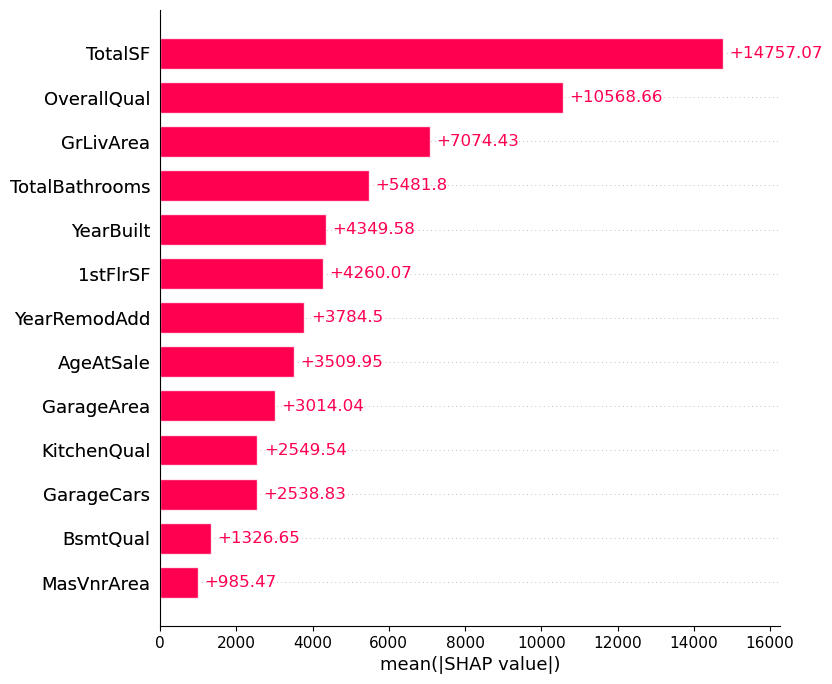

In [38]:
shap.plots.bar(shap_values, max_display=20)

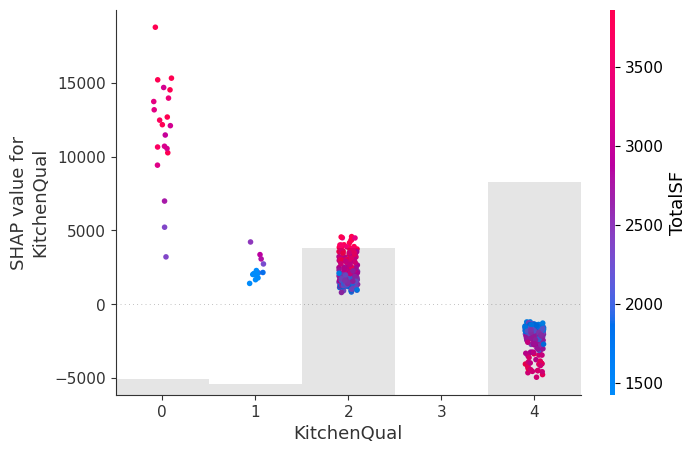

In [39]:
shap.plots.scatter(shap_values[:,"KitchenQual"], color=shap_values[:,"TotalSF"])

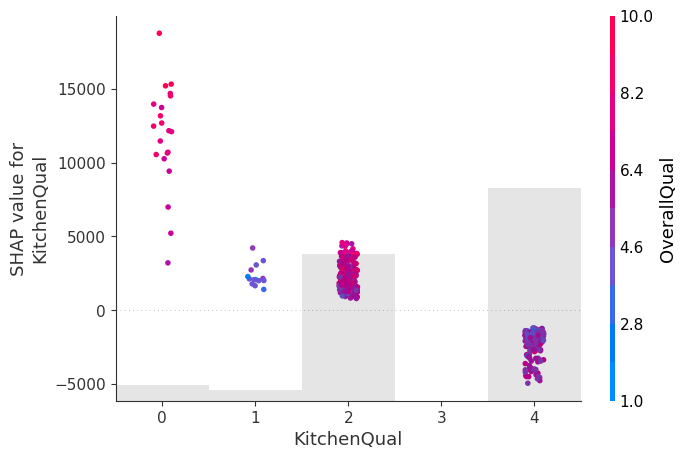

In [40]:
shap.plots.scatter(shap_values[:,"KitchenQual"], color=shap_values[:,"OverallQual"])

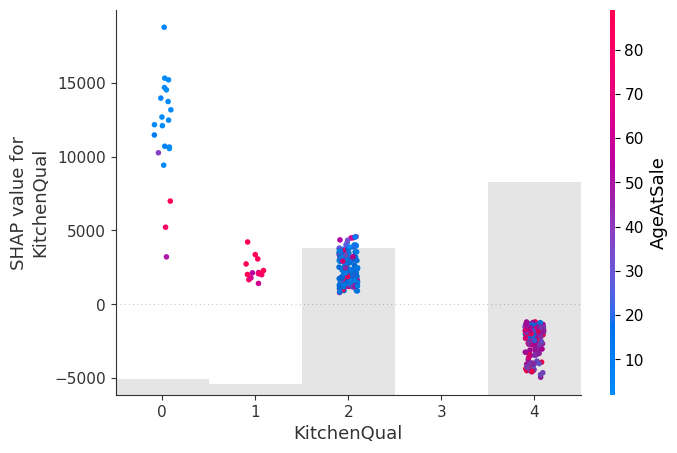

In [41]:
shap.plots.scatter(shap_values[:,"KitchenQual"], color=shap_values[:,"AgeAtSale"])

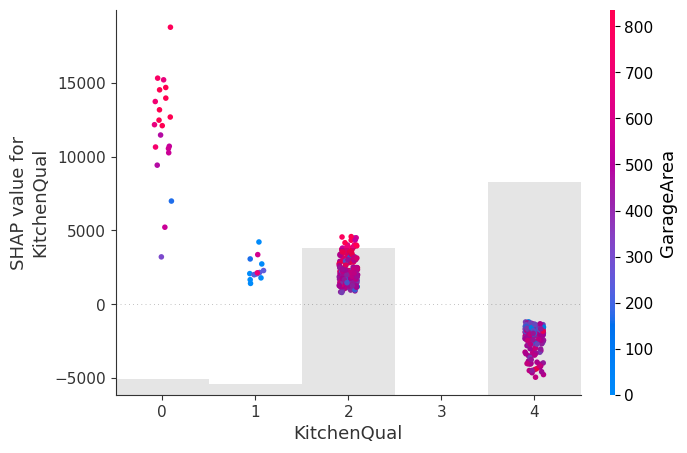

In [42]:
shap.plots.scatter(shap_values[:,"KitchenQual"], color=shap_values[:,"GarageArea"])

In [ ]:
shap.plots.scatter(shap_values[:,"ExterQual"], color=shap_values[:,"TotalSF"])

In [ ]:
shap.plots.scatter(shap_values[:,"ExterQual"], color=shap_values[:,"OverallQual"])

In [ ]:
shap.plots.scatter(shap_values[:,"ExterQual"], color=shap_values[:,"AgeAtSale"])

In [ ]:
shap.plots.scatter(shap_values[:,"ExterQual"], color=shap_values[:,"GarageArea"])

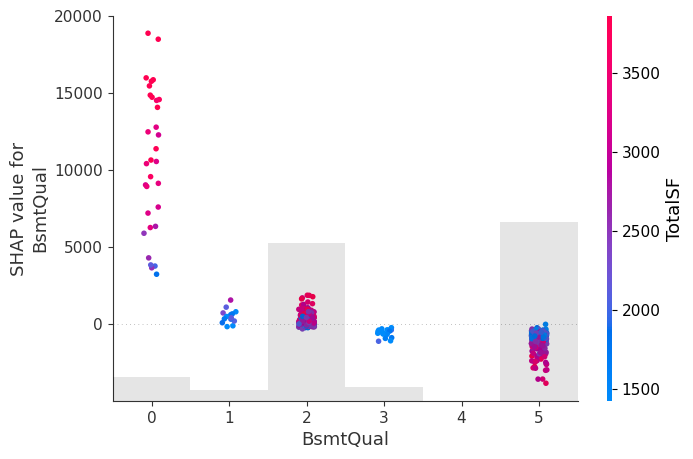

In [50]:
shap.plots.scatter(shap_values[:,"BsmtQual"], color=shap_values[:,"TotalSF"])

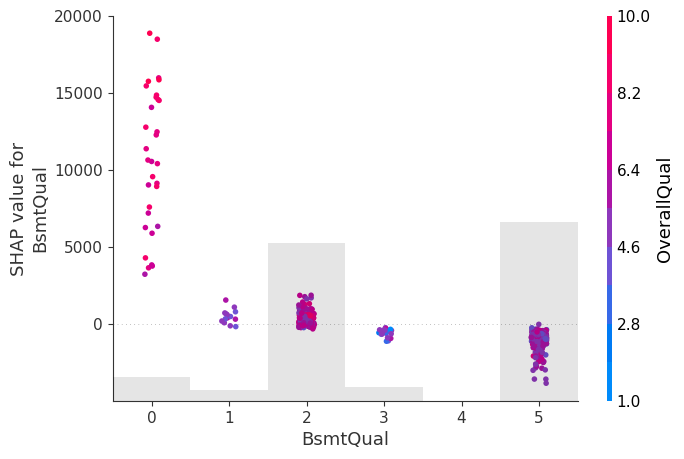

In [52]:
shap.plots.scatter(shap_values[:,"BsmtQual"], color=shap_values[:,"OverallQual"])

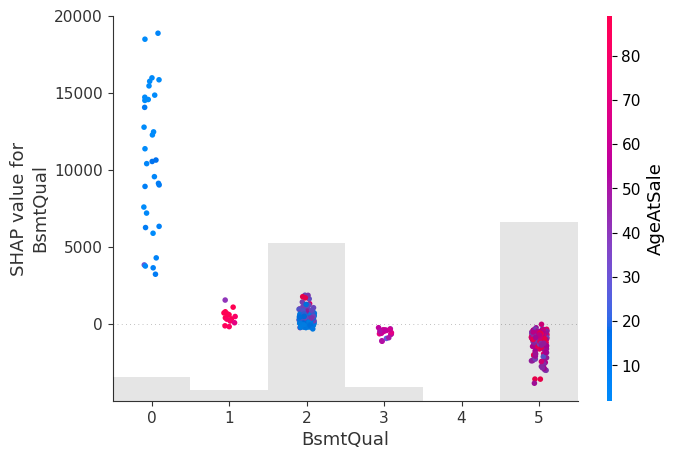

In [53]:
shap.plots.scatter(shap_values[:,"BsmtQual"], color=shap_values[:,"AgeAtSale"])

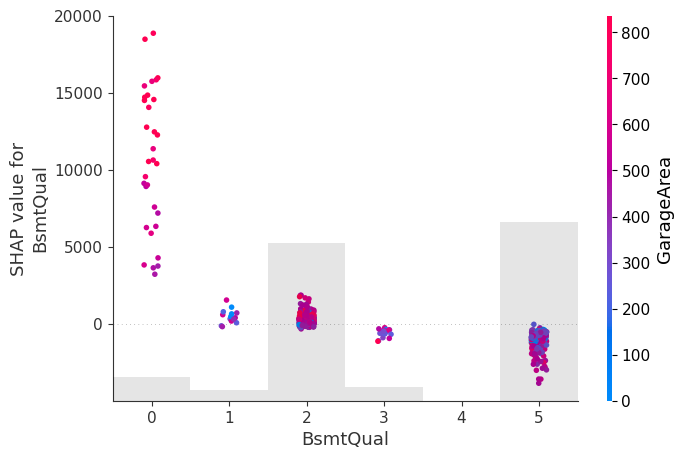

In [54]:
shap.plots.scatter(shap_values[:,"BsmtQual"], color=shap_values[:,"GarageArea"])

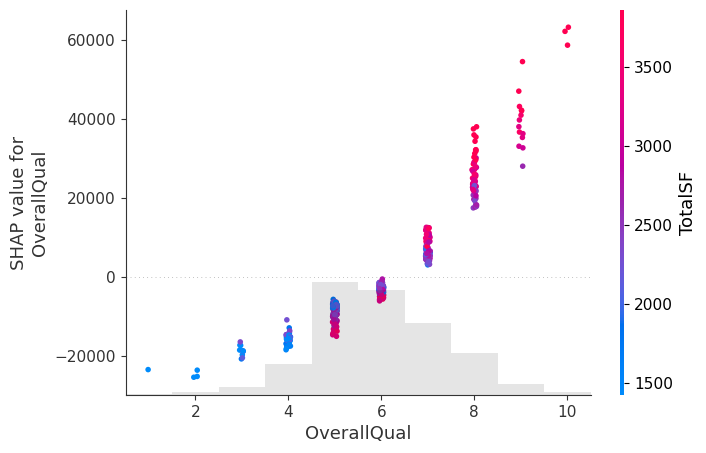

In [55]:
shap.plots.scatter(shap_values[:,"OverallQual"], color=shap_values[:,"TotalSF"])

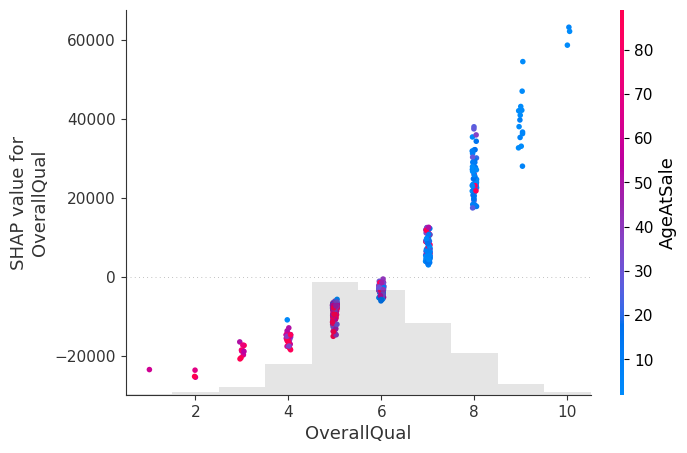

In [56]:
shap.plots.scatter(shap_values[:,"OverallQual"], color=shap_values[:,"AgeAtSale"])

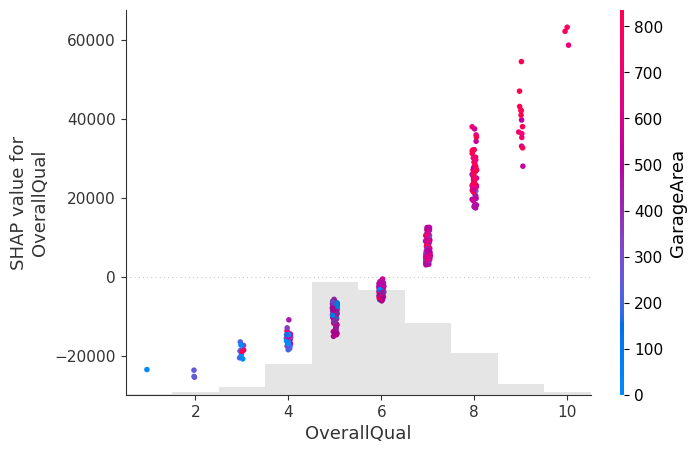

In [57]:
shap.plots.scatter(shap_values[:,"OverallQual"], color=shap_values[:,"GarageArea"])

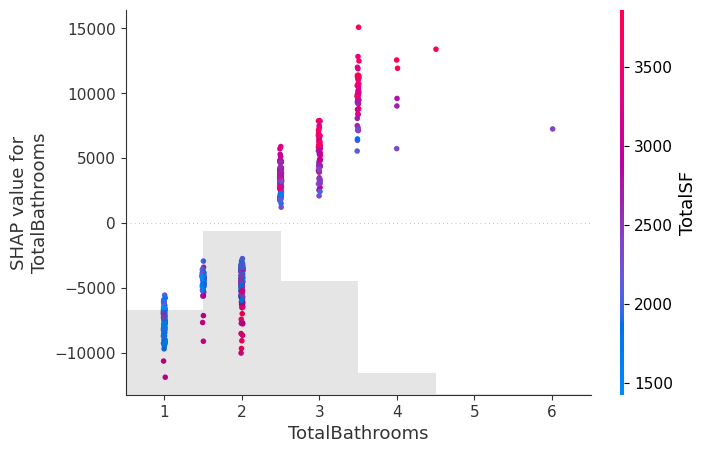

In [58]:
shap.plots.scatter(shap_values[:,"TotalBathrooms"], color=shap_values[:,"TotalSF"])

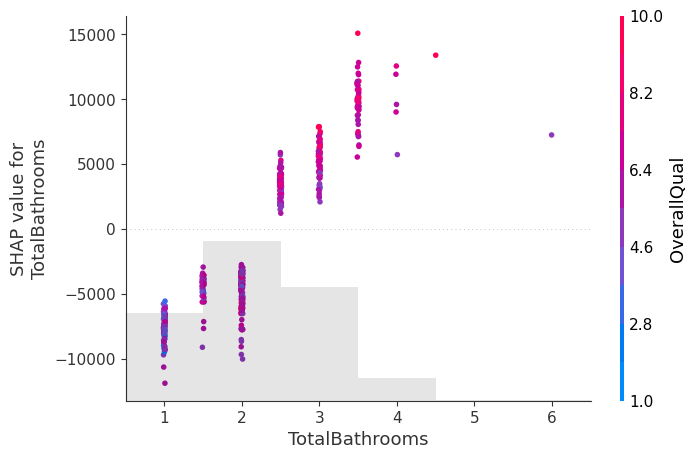

In [59]:
shap.plots.scatter(shap_values[:,"TotalBathrooms"], color=shap_values[:,"OverallQual"])

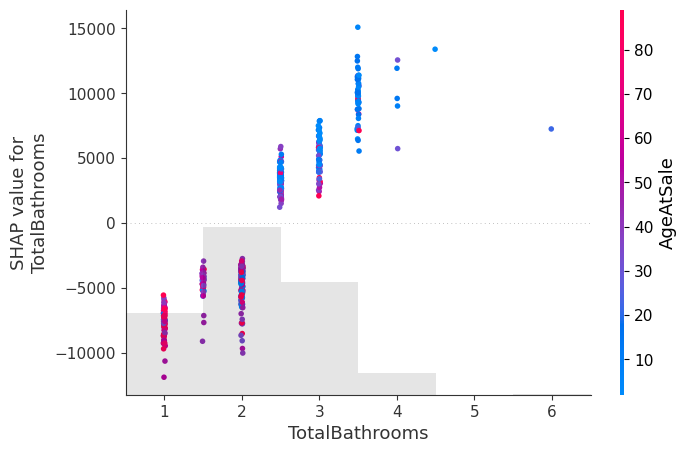

In [60]:
shap.plots.scatter(shap_values[:,"TotalBathrooms"], color=shap_values[:,"AgeAtSale"])

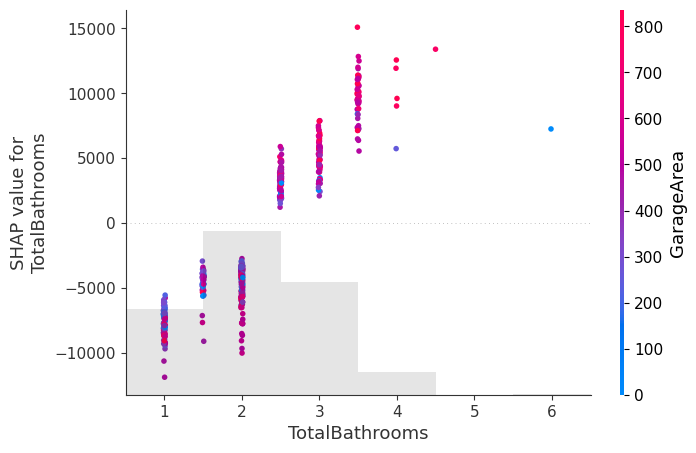

In [61]:
shap.plots.scatter(shap_values[:,"TotalBathrooms"], color=shap_values[:,"GarageArea"])

In [82]:
kitchenshapvals = shap_values[:,"KitchenQual"].values
kitchenvals = shap_values[:,"KitchenQual"].data
basementshapvals = shap_values[:,"BsmtQual"].values
basementvals = shap_values[:,"BsmtQual"].data
overallshapvals = shap_values[:,"OverallQual"].values
overallvals = shap_values[:,"OverallQual"].data
bathroomsshapvals = shap_values[:,"TotalBathrooms"].values
bathroomsvals = shap_values[:,"TotalBathrooms"].data
sqftvals = shap_values[:,"TotalSF"].data
agevals = shap_values[:,"AgeAtSale"].data

In [85]:
df = pd.DataFrame(np.stack((kitchenshapvals, kitchenvals, basementshapvals, 
                            basementvals, overallshapvals, overallvals, 
                            bathroomsshapvals, bathroomsvals, sqftvals, agevals), axis=1),
                 columns=["kitchenshapvals", "kitchenvals", "basementshapvals", 
                            "basementvals", "overallshapvals", "overallvals", 
                            "bathroomsshapvals", "bathroomsvals", "sqftvals", "agevals"])
df.head()

,kitchenshapvals,kitchenvals,basementshapvals,basementvals,overallshapvals,overallvals,bathroomsshapvals,bathroomsvals,sqftvals,agevals
0,-2155.978094,4.0,-841.051090,5.0,5857.519426,7.0,-9261.740190,1.0,1686.0,78.0
1,1546.646560,2.0,27.722300,2.0,4477.768160,7.0,4142.230300,3.0,2395.0,4.0
2,-4490.956364,4.0,1413.844571,2.0,11131.054004,7.0,-6521.497501,2.0,3392.0,36.0
3,10538.727314,0.0,7580.010517,0.0,33074.552057,9.0,7502.548687,3.0,3154.0,2.0
4,-2435.824603,4.0,-1130.792791,5.0,-8590.488494,5.0,3268.347020,2.5,2634.0,39.0


In [96]:
shapcolumns = ["kitchenshapvals", "basementshapvals", 
               "overallshapvals", "bathroomsshapvals", 
               "sqftvals", "agevals"]
df[shapcolumns].describe()

,kitchenshapvals,basementshapvals,overallshapvals,bathroomsshapvals,sqftvals,agevals
count,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000
mean,255.983343,313.629500,389.819915,-559.048844,2508.641473,37.736434
std,3350.127762,3011.519404,14284.824821,5960.193675,778.887016,28.083930
min,-4941.285888,-3858.867826,-25405.022994,-11890.711977,334.000000,0.000000
25%,-1832.194876,-807.707158,-7642.733967,-5280.113842,1980.750000,11.750000
50%,-1489.784493,-250.526640,-3415.761401,-3438.518521,2466.500000,37.000000
75%,2025.510738,369.009860,5502.560261,4136.495177,2919.000000,53.000000
max,18751.339585,18866.590111,63201.529370,15097.532375,5496.000000,129.000000


In [108]:
df["islarge"] = df["sqftvals"] > df["sqftvals"].mean()
df["isold"] = df["agevals"] > df["agevals"].mean()

In [109]:
# KitchenQual statistics
display(df[shapcolumns + ["kitchenvals"]].groupby(kitchenvals).mean())
display(df[shapcolumns + ["kitchenvals", "islarge"]].groupby(["kitchenvals", "islarge"]).mean())
display(df[shapcolumns + ["kitchenvals", "isold"]].groupby(["kitchenvals", "isold"]).mean())

,kitchenshapvals,basementshapvals,overallshapvals,bathroomsshapvals,sqftvals,agevals,kitchenvals
0.0,11763.597187,7971.030748,29919.877713,6517.971240,3607.523810,15.047619,0.0
1.0,2352.019706,-563.936681,-16129.390638,-6085.635762,1639.857143,79.214286,1.0
2.0,2264.592992,878.539008,8243.419664,2463.690201,2863.489796,21.530612,2.0
4.0,-2076.268906,-595.990722,-6375.681197,-2887.827993,2226.312281,48.515789,4.0


kitchenshapvals  basementshapvals  overallshapvals  \
kitchenvals islarge                                                       
0.0         False        4209.503569       -698.364787      2388.767868   
            True        12558.764936       8883.598699     32817.889276   
1.0         False        2208.660573       -365.103812    -16131.191308   
            True         3212.174499      -1756.933897    -16118.586618   
2.0         False        1443.981111       -195.791149      -594.317916   
            True         2626.627646       1352.508194     12142.421538   
4.0         False       -1720.856227       -457.249247     -7503.951786   
            True        -2846.329712       -896.597250     -3931.094921   

                     bathroomsshapvals     sqftvals    agevals  
kitchenvals islarge                                             
0.0         False         -4181.915713  2372.500000  65.000000  
            True           7644.275130  3737.526316   9.789474  
1.0         False         -6015.692000  1438.750000  76.416667  
            True          -6505.298336  2846.500000  96.000000  
2.0         False         -1183.201434  2144.683333  35.916667  
            True           4072.612981  3180.610294  15.183824  
4.0         False         -3784.517461  1892.789744  50.712821  
            True           -945.000814  2948.944444  43.755556

kitchenshapvals  basementshapvals  overallshapvals  \
kitchenvals isold                                                       
0.0         False     13022.346818       9924.268308     35602.424542   
            True       6413.911252       -330.228885      5769.053689   
1.0         True       2352.019706       -563.936681    -16129.390638   
2.0         False      2320.048147       1240.536173     10704.371271   
            True       2034.016294       -626.607100     -1988.958072   
4.0         False     -2062.366026        -27.003973     -3454.292044   
            True      -2082.479330       -850.157391     -7680.667214   

                   bathroomsshapvals     sqftvals    agevals  
kitchenvals isold                                             
0.0         False        8055.860129  3771.117647   3.176471  
            True          -18.056537  2912.250000  65.500000  
1.0         True        -6085.635762  1639.857143  79.214286  
2.0         False        3722.350065  2973.911392  10.822785  
            True        -2769.685026  2404.368421  66.052632  
4.0         False        -272.855640  2292.147727  25.704545  
            True        -4055.937471  2196.903553  58.705584

In [110]:
# BasementQual statistics
display(df[shapcolumns + ["basementvals"]].groupby(basementvals).mean())
display(df[shapcolumns + ["basementvals", "islarge"]].groupby(["basementvals", "islarge"]).mean())
display(df[shapcolumns + ["basementvals", "isold"]].groupby(["basementvals", "isold"]).mean())

,kitchenshapvals,basementshapvals,overallshapvals,bathroomsshapvals,sqftvals,agevals,basementvals
0.0,6783.729918,10687.032862,28562.050770,7088.440449,3512.093750,6.156250,0.0
1.0,-949.316853,482.396230,-9130.053247,-5664.113122,1844.285714,85.214286,1.0
2.0,1070.020027,324.043347,5502.848357,2629.734908,2798.650943,17.367925,2.0
3.0,-1416.917243,-601.101591,-11500.770118,-6486.958135,1227.555556,60.055556,3.0
5.0,-1137.671882,-1019.929740,-6435.865803,-3653.084451,2253.508333,55.495833,5.0


kitchenshapvals  basementshapvals  overallshapvals  \
basementvals islarge                                                       
0.0          False        -735.080543       3596.468653      2042.365824   
             True         7561.537897      11420.539505     31305.466454   
1.0          False        -821.235937        400.947728     -9790.201040   
             True        -2614.368770       1541.226759      -548.131933   
2.0          False        -261.321982        122.316263     -2029.901737   
             True         1726.315384        423.486275      9216.175868   
3.0          False       -1416.917243       -601.101591    -11500.770118   
5.0          False        -953.495792       -729.897476     -7378.629899   
             True        -1542.859282      -1658.000721     -4361.784790   

                      bathroomsshapvals     sqftvals    agevals  
basementvals islarge                                             
0.0          False          1271.216330  2000.000000  15.000000  
             True           7690.222255  3668.517241   5.241379  
1.0          False         -5815.647000  1772.000000  88.615385  
             True          -3694.172708  2784.000000  41.000000  
2.0          False            -9.091201  2137.628571  20.885714  
             True           3930.564680  3124.507042  15.633803  
3.0          False         -6486.958135  1227.555556  60.055556  
5.0          False         -4244.446872  1933.448485  56.672727  
             True          -2352.087124  2957.640000  52.906667

kitchenshapvals  basementshapvals  overallshapvals  \
basementvals isold                                                       
0.0          False      6783.729918      10687.032862     28562.050770   
1.0          True       -949.316853        482.396230     -9130.053247   
2.0          False      1238.155492        285.380386      6266.824742   
             True       -637.882330        716.777632     -2257.543346   
3.0          False     -2054.992876       -948.353850     -3116.548559   
             True      -1379.383382       -580.674987    -11993.959621   
5.0          False     -1284.569772       -912.815818     -3454.380355   
             True      -1110.897390      -1039.452967     -6979.289259   

                    bathroomsshapvals     sqftvals    agevals  
basementvals isold                                             
0.0          False        7088.440449  3512.093750   6.156250  
1.0          True        -5664.113122  1844.285714  85.214286  
2.0          False        2866.729754  2801.544041  13.611399  
             True          222.366207  2769.263158  55.526316  
3.0          False       -5962.852026  1654.000000  29.000000  
             True        -6517.787906  1202.470588  61.882353  
5.0          False       -1975.039155  2188.027027  31.702703  
             True        -3958.935071  2265.443350  59.832512

In [111]:
# OverallQual statistics
display(df[shapcolumns + ["overallvals"]].groupby(overallvals).mean())
display(df[shapcolumns + ["overallvals", "islarge"]].groupby(["overallvals", "islarge"]).mean())
display(df[shapcolumns + ["overallvals", "isold"]].groupby(["overallvals", "isold"]).mean())

,kitchenshapvals,basementshapvals,overallshapvals,bathroomsshapvals,sqftvals,agevals,overallvals
1.0,2072.734556,-359.561630,-23471.419221,-8099.544633,334.000000,61.000000,1.0
2.0,-295.718877,-725.632665,-24742.688044,-8905.332808,795.666667,73.000000,2.0
3.0,-1471.813471,-699.069513,-18695.971651,-6644.945245,1438.500000,75.500000,3.0
4.0,-672.807624,-575.195526,-15711.292970,-4967.400782,1780.317073,58.878049,4.0
5.0,-1433.653275,-700.206171,-8319.141136,-3548.658735,2201.092715,53.463576,5.0
6.0,-691.251411,-342.399991,-3128.569327,-102.555746,2478.290780,35.092199,6.0
7.0,1318.973803,606.875601,6931.073261,2271.490777,2804.427083,21.833333,7.0
8.0,3791.164115,1838.265183,25506.314116,4030.825558,3344.642857,15.196429,8.0
9.0,7070.040287,9806.794886,39252.699033,6186.506336,3568.928571,3.285714,9.0
10.0,16415.309453,16818.162524,61337.821463,12122.206212,5355.333333,3.000000,10.0


kitchenshapvals  basementshapvals  overallshapvals  \
overallvals islarge                                                       
1.0         False        2072.734556       -359.561630    -23471.419221   
2.0         False        -295.718877       -725.632665    -24742.688044   
3.0         False       -1471.813471       -699.069513    -18695.971651   
4.0         False        -872.037477       -514.593558    -15690.406116   
            True         3212.174499      -1756.933897    -16118.586618   
5.0         False       -1170.629150       -475.444185     -7528.565117   
            True        -2163.545221      -1323.920685    -10512.989589   
6.0         False        -865.968478       -345.300626     -2785.271105   
            True         -508.937950       -339.373241     -3486.793558   
7.0         False         730.946112         60.457452      5199.522759   
            True         1561.102852        831.871309      7644.064644   
8.0         False        1071.985949       -229.920586     19896.443115   
            True         4057.750210       2041.028494     26056.301470   
9.0         True         7070.040287       9806.794886     39252.699033   
10.0        True        16415.309453      16818.162524     61337.821463   

                     bathroomsshapvals     sqftvals    agevals  
overallvals islarge                                             
1.0         False         -8099.544633   334.000000  61.000000  
2.0         False         -8905.332808   795.666667  73.000000  
3.0         False         -6644.945245  1438.500000  75.500000  
4.0         False         -4888.534240  1725.641026  56.974359  
            True          -6505.298336  2846.500000  96.000000  
5.0         False         -3930.293708  1951.054054  53.495495  
            True          -2489.621684  2894.950000  53.375000  
6.0         False         -1985.156309  2028.388889  39.347222  
            True           1861.897015  2947.753623  30.652174  
7.0         False           -22.931214  2168.821429  28.642857  
            True           3216.252774  3066.147059  19.029412  
8.0         False         -3554.273132  2408.200000  52.200000  
            True           4774.462685  3436.450980  11.568627  
9.0         True           6186.506336  3568.928571   3.285714  
10.0        True          12122.206212  5355.333333   3.000000

kitchenshapvals  basementshapvals  overallshapvals  \
overallvals isold                                                       
1.0         True       2072.734556       -359.561630    -23471.419221   
2.0         True       -295.718877       -725.632665    -24742.688044   
3.0         True      -1471.813471       -699.069513    -18695.971651   
4.0         False      -984.799078       -474.921753    -15394.655610   
            True       -585.060027       -603.397524    -15800.347227   
5.0         False     -1311.570223         36.378760     -7549.147703   
            True      -1461.444539       -867.884042     -8494.424194   
6.0         False      -280.028468         67.410922     -3207.697511   
            True      -1215.229034       -864.578411     -3027.744705   
7.0         False      1578.605154        887.546183      6556.240917   
            True        266.783590       -530.578864      8450.130654   
8.0         False      3856.407746       1965.669483     25613.368233   
            True       2638.526633       -412.544104     23615.024720   
9.0         False      7070.040287       9806.794886     39252.699033   
10.0        False     16415.309453      16818.162524     61337.821463   

                   bathroomsshapvals     sqftvals    agevals  
overallvals isold                                             
1.0         True        -8099.544633   334.000000  61.000000  
2.0         True        -8905.332808   795.666667  73.000000  
3.0         True        -6644.945245  1438.500000  75.500000  
4.0         False       -3378.662447  1741.444444  32.222222  
            True        -5414.233438  1791.250000  66.375000  
5.0         False       -1790.001211  2189.428571  25.928571  
            True        -3949.003537  2203.747967  59.731707  
6.0         False        1806.056643  2464.405063  19.936709  
            True        -2534.497339  2495.983871  54.403226  
7.0         False        3662.107358  2844.545455  10.350649  
            True        -3364.165890  2641.842105  68.368421  
8.0         False        4414.324214  3376.792453  11.000000  
            True        -2744.317366  2776.666667  89.333333  
9.0         False        6186.506336  3568.928571   3.285714  
10.0        False       12122.206212  5355.333333   3.000000

In [112]:
# TotalBathrooms statistics
display(df[shapcolumns + ["bathroomsvals"]].groupby(overallvals).mean())
display(df[shapcolumns + ["bathroomsvals", "islarge"]].groupby(["bathroomsvals", "islarge"]).mean())
display(df[shapcolumns + ["bathroomsvals", "isold"]].groupby(["bathroomsvals", "isold"]).mean())

,kitchenshapvals,basementshapvals,overallshapvals,bathroomsshapvals,sqftvals,agevals,bathroomsvals
1.0,2072.734556,-359.561630,-23471.419221,-8099.544633,334.000000,61.000000,1.000000
2.0,-295.718877,-725.632665,-24742.688044,-8905.332808,795.666667,73.000000,1.000000
3.0,-1471.813471,-699.069513,-18695.971651,-6644.945245,1438.500000,75.500000,1.350000
4.0,-672.807624,-575.195526,-15711.292970,-4967.400782,1780.317073,58.878049,1.487805
5.0,-1433.653275,-700.206171,-8319.141136,-3548.658735,2201.092715,53.463576,1.850993
6.0,-691.251411,-342.399991,-3128.569327,-102.555746,2478.290780,35.092199,2.269504
7.0,1318.973803,606.875601,6931.073261,2271.490777,2804.427083,21.833333,2.567708
8.0,3791.164115,1838.265183,25506.314116,4030.825558,3344.642857,15.196429,2.750000
9.0,7070.040287,9806.794886,39252.699033,6186.506336,3568.928571,3.285714,3.000000
10.0,16415.309453,16818.162524,61337.821463,12122.206212,5355.333333,3.000000,3.666667


kitchenshapvals  basementshapvals  overallshapvals  \
bathroomsvals islarge                                                       
1.0           False       -1109.180007       -573.411138     -9852.107401   
              True        -1212.385375      -1703.099793     -8715.361531   
1.5           False        -860.801413       -475.061438     -6737.783402   
              True        -1102.753913      -1272.649387     -2166.082951   
2.0           False        -754.637135       -391.225174     -5352.335849   
              True         -793.631634       -621.233870       761.801093   
2.5           False        -570.793634       -233.296438     -2734.276179   
              True         1162.439589        448.965471      7527.711656   
3.0           False         -19.237836        103.036041     -3653.414314   
              True         3190.668828       2919.750853     13812.774372   
3.5           False         240.187889        -84.581534        95.308940   
              True         3195.392881       2625.500864     13549.122561   
4.0           False       -1920.052315         50.041321     -7041.737551   
              True         2181.793997       3404.620166      9735.236611   
4.5           True        15303.756330      15843.284716     62154.514358   
6.0           False       -1764.902678        122.013917     -7425.184457   

                       bathroomsshapvals     sqftvals    agevals  
bathroomsvals islarge                                             
1.0           False         -7505.093279  1662.743590  67.525641  
              True          -8299.389643  2787.000000  64.375000  
1.5           False         -4379.693414  1851.268293  47.878049  
              True          -5124.617956  2782.214286  50.714286  
2.0           False         -3925.225904  2021.569767  46.965116  
              True          -5676.164914  2985.571429  36.267857  
2.5           False          2704.271772  2176.767442  26.279070  
              True           3752.966838  2982.861538  20.569231  
3.0           False          3635.506977  2232.071429  42.214286  
              True           5662.691886  3390.909091  18.254545  
3.5           False          6567.666399  2156.000000   9.600000  
              True          10116.689727  3349.454545  16.272727  
4.0           False          5736.185400  2304.000000  31.000000  
              True          10783.299682  3292.250000  16.500000  
4.5           True          13402.481684  5304.000000   2.000000  
6.0           False          7253.705942  2400.000000  22.000000

kitchenshapvals  basementshapvals  overallshapvals  \
bathroomsvals isold                                                       
1.0           False     -1060.354716       -354.372231    -10329.098964   
              True      -1122.387036       -698.506247     -9710.392280   
1.5           False     -1264.520554       -432.416136     -6308.290457   
              True       -769.330613       -787.987791     -5245.614290   
2.0           False        20.694154        254.613779      2312.303356   
              True      -1300.255669       -975.852318     -6464.015448   
2.5           False      1180.938757        555.386045      7086.473270   
              True      -1210.528079       -720.572831     -5213.893332   
3.0           False      3202.172887       3062.073702     14114.166122   
              True        -64.432353       -456.089438     -4837.453333   
3.5           False      3170.902554       2536.818771     13438.253814   
              True      -1354.430431       -531.511034     -7173.912682   
4.0           False      1361.424735       2733.704397      6379.841778   
4.5           False     15303.756330      15843.284716     62154.514358   
6.0           False     -1764.902678        122.013917     -7425.184457   

                     bathroomsshapvals     sqftvals    agevals  
bathroomsvals isold                                             
1.0           False       -7250.715948  1728.800000  27.200000  
              True        -7599.244607  1769.703704  69.703704  
1.5           False       -4519.093989  1780.000000  28.529412  
              True        -4591.775883  2226.131579  57.578947  
2.0           False       -4918.427423  2498.877193  19.350877  
              True        -4412.756469  2336.600000  58.435294  
2.5           False        3507.890089  2702.671053  12.381579  
              True         2925.840122  2565.125000  47.687500  
3.0           False        5554.998995  3239.545455  12.981818  
              True         4058.586191  2826.714286  62.928571  
3.5           False        9844.522033  3208.717391  11.434783  
              True         8374.888818  3518.333333  79.333333  
4.0           False        9773.876826  3094.600000  19.400000  
4.5           False       13402.481684  5304.000000   2.000000  
6.0           False        7253.705942  2400.000000  22.000000

## 3.4. Summary

- - - 